## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how= "left", on= ["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice (starting with 249 unique IDs)
combined_data["Mouse ID"].value_counts(normalize=True)

g989    0.006867
c832    0.005283
m601    0.005283
v991    0.005283
d251    0.005283
          ...   
n482    0.000528
v199    0.000528
l872    0.000528
x336    0.000528
u153    0.000528
Name: Mouse ID, Length: 249, dtype: float64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df= combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
print(duplicates_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data= combined_data[combined_data["Mouse ID"] == "g989"].index

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop(dup_data, inplace= True)

In [6]:
# Checking the number of mice in the clean DataFrame (now 248 once duplicate was dropped)
combined_data["Mouse ID"].value_counts(normalize=True)

i738    0.005319
a444    0.005319
i901    0.005319
v991    0.005319
d251    0.005319
          ...   
x226    0.000532
u153    0.000532
x336    0.000532
v199    0.000532
d133    0.000532
Name: Mouse ID, Length: 248, dtype: float64

## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Groupby drug regimen
summary_df= combined_data[["Drug Regimen", "Tumor Volume (mm3)"]]

drug_summary= summary_df.groupby(["Drug Regimen"])

# Assemble the resulting series into a single summary dataframe.
drug_group_mean= drug_summary.mean()
drug_group_mean= drug_group_mean.rename(columns={"Tumor Volume (mm3)": "Average Tumor Vol (mm3)"})
drug_group_mean.head()

,Average Tumor Vol (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group_median= drug_summary.median()
drug_group_median= drug_group_median.rename(columns={"Tumor Volume (mm3)": "Median Tumor Vol (mm3)"})

drug_group_var= drug_summary.var()
drug_group_var= drug_group_var.rename(columns={"Tumor Volume (mm3)": "Variance in Tumor Vol"})

drug_group_std= drug_summary.std()
drug_group_std= drug_group_std.rename(columns={"Tumor Volume (mm3)": "Standard Deviation in Tumor Vol (mm3)"})

drug_group_sem= drug_summary.sem()
drug_group_sem= drug_group_sem.rename(columns={"Tumor Volume (mm3)": "Standard Error of Mean"})

# Using the aggregation method, produce the same summary statistics in a single line
drug_group_final= pd.concat([drug_group_mean, drug_group_median, drug_group_var, drug_group_std, drug_group_sem], axis= 1)
drug_group_final

,Average Tumor Vol (mm3),Median Tumor Vol (mm3),Variance in Tumor Vol,Standard Deviation in Tumor Vol (mm3),Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Find uniques
bar_graph_df= combined_data[["Mouse ID", "Drug Regimen"]]
bar_data= bar_graph_df.groupby("Drug Regimen").nunique()
del bar_data["Drug Regimen"]
bar_data

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


In [25]:
# Set variables
bar_data["Drug Regimen"]= bar_data.index
total_mice= bar_data["Mouse ID"]
drug_regimen= bar_data["Drug Regimen"]

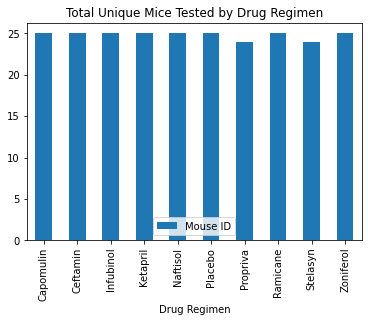

In [17]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_data.plot(kind="bar", title="Total Unique Mice Tested by Drug Regimen")

Text(0.5, 1.0, 'Total Unique Mice Tested by Drug Regimen')

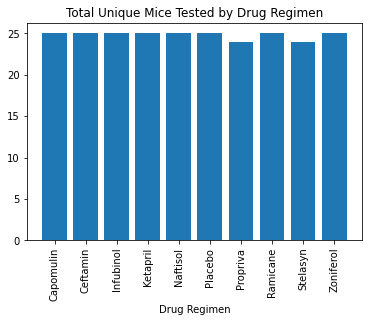

In [31]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot
plt.bar(drug_regimen, total_mice, align="center")
plt.xlabel("Drug Regimen")
tick_loc= [value for value in drug_regimen]
plt.xticks(tick_loc, drug_regimen, rotation="vertical")
plt.title("Total Unique Mice Tested by Drug Regimen")

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
